In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import cv2 as cv
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from pprint import pprint

mpl.rcParams['figure.dpi'] = 200

In [18]:
original = cv.imread("images/coins.jpg")
detected = original.copy()
img = original.copy()
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.medianBlur(img, 5)

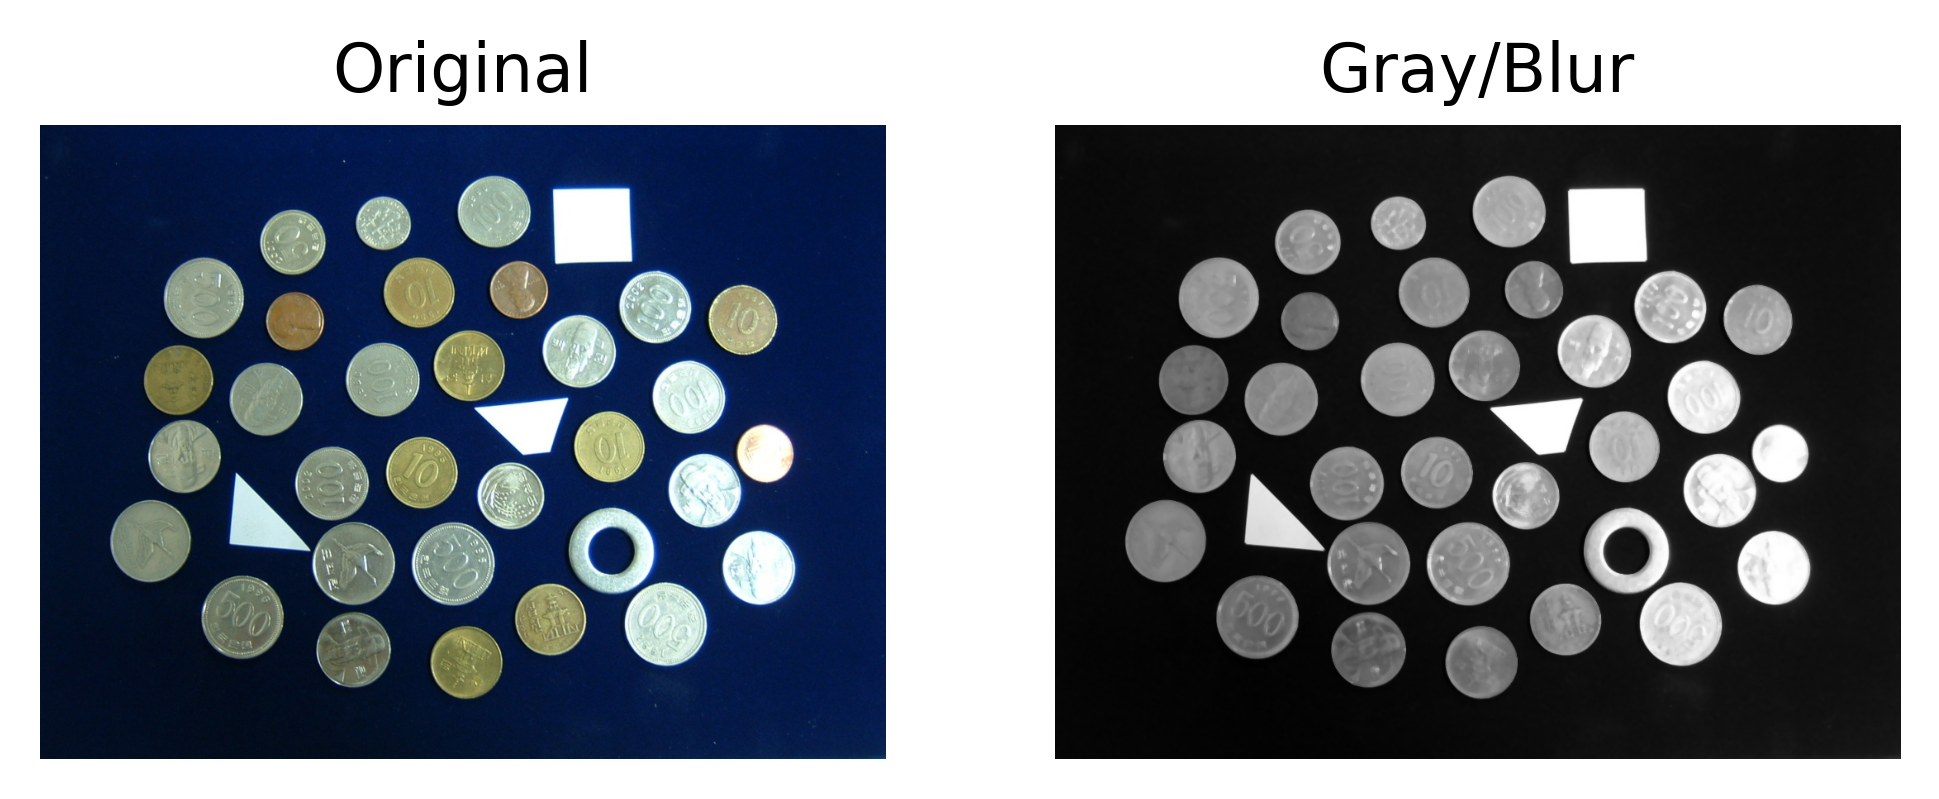

In [19]:
fig = plt.figure()

fig.add_subplot(1, 2, 1)
plt.axis('off')
plt.title("Original")
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))

fig.add_subplot(1, 2, 2)
plt.axis('off')
plt.title("Gray/Blur")
plt.imshow(img, cmap='gray')

plt.show()

Treshold value: 86.0


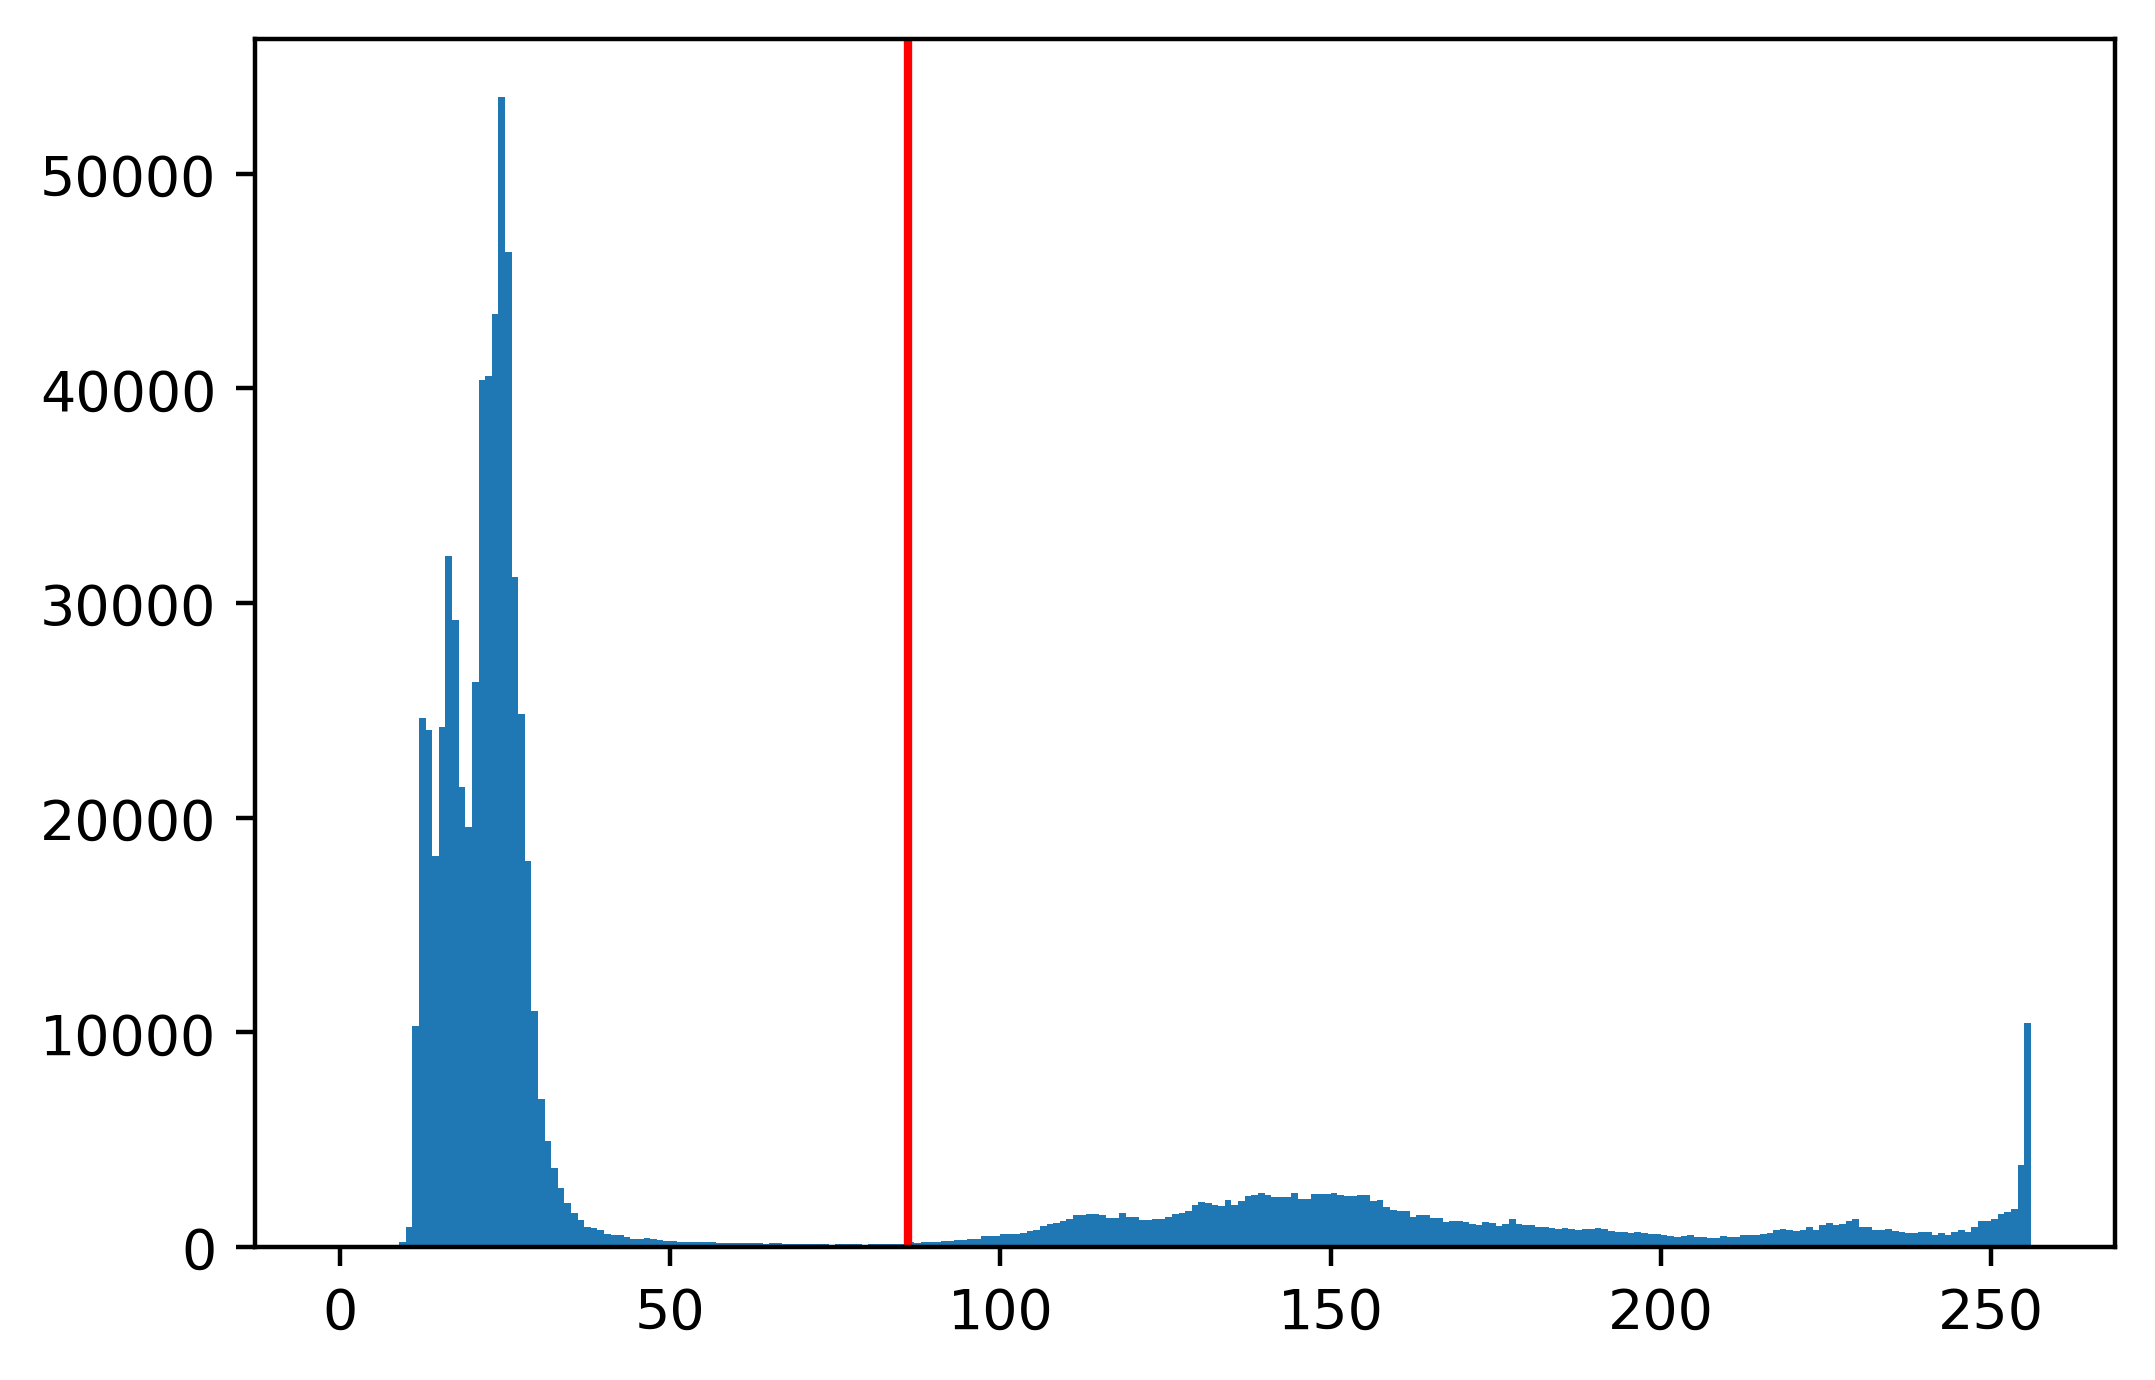

In [20]:
# ret0 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 13, 7)
# ret1 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 13, 7)
# _, thresh = cv.threshold(img, 50, 255, cv.THRESH_BINARY)

ret, thresh = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
ret, thresh = cv.threshold(img, ret-10, 255, cv.THRESH_BINARY)
plt.axvline(x=ret, color="r")
print("Treshold value: {}".format(ret))
plt.hist(img.ravel(),256,[0,256]); plt.show()

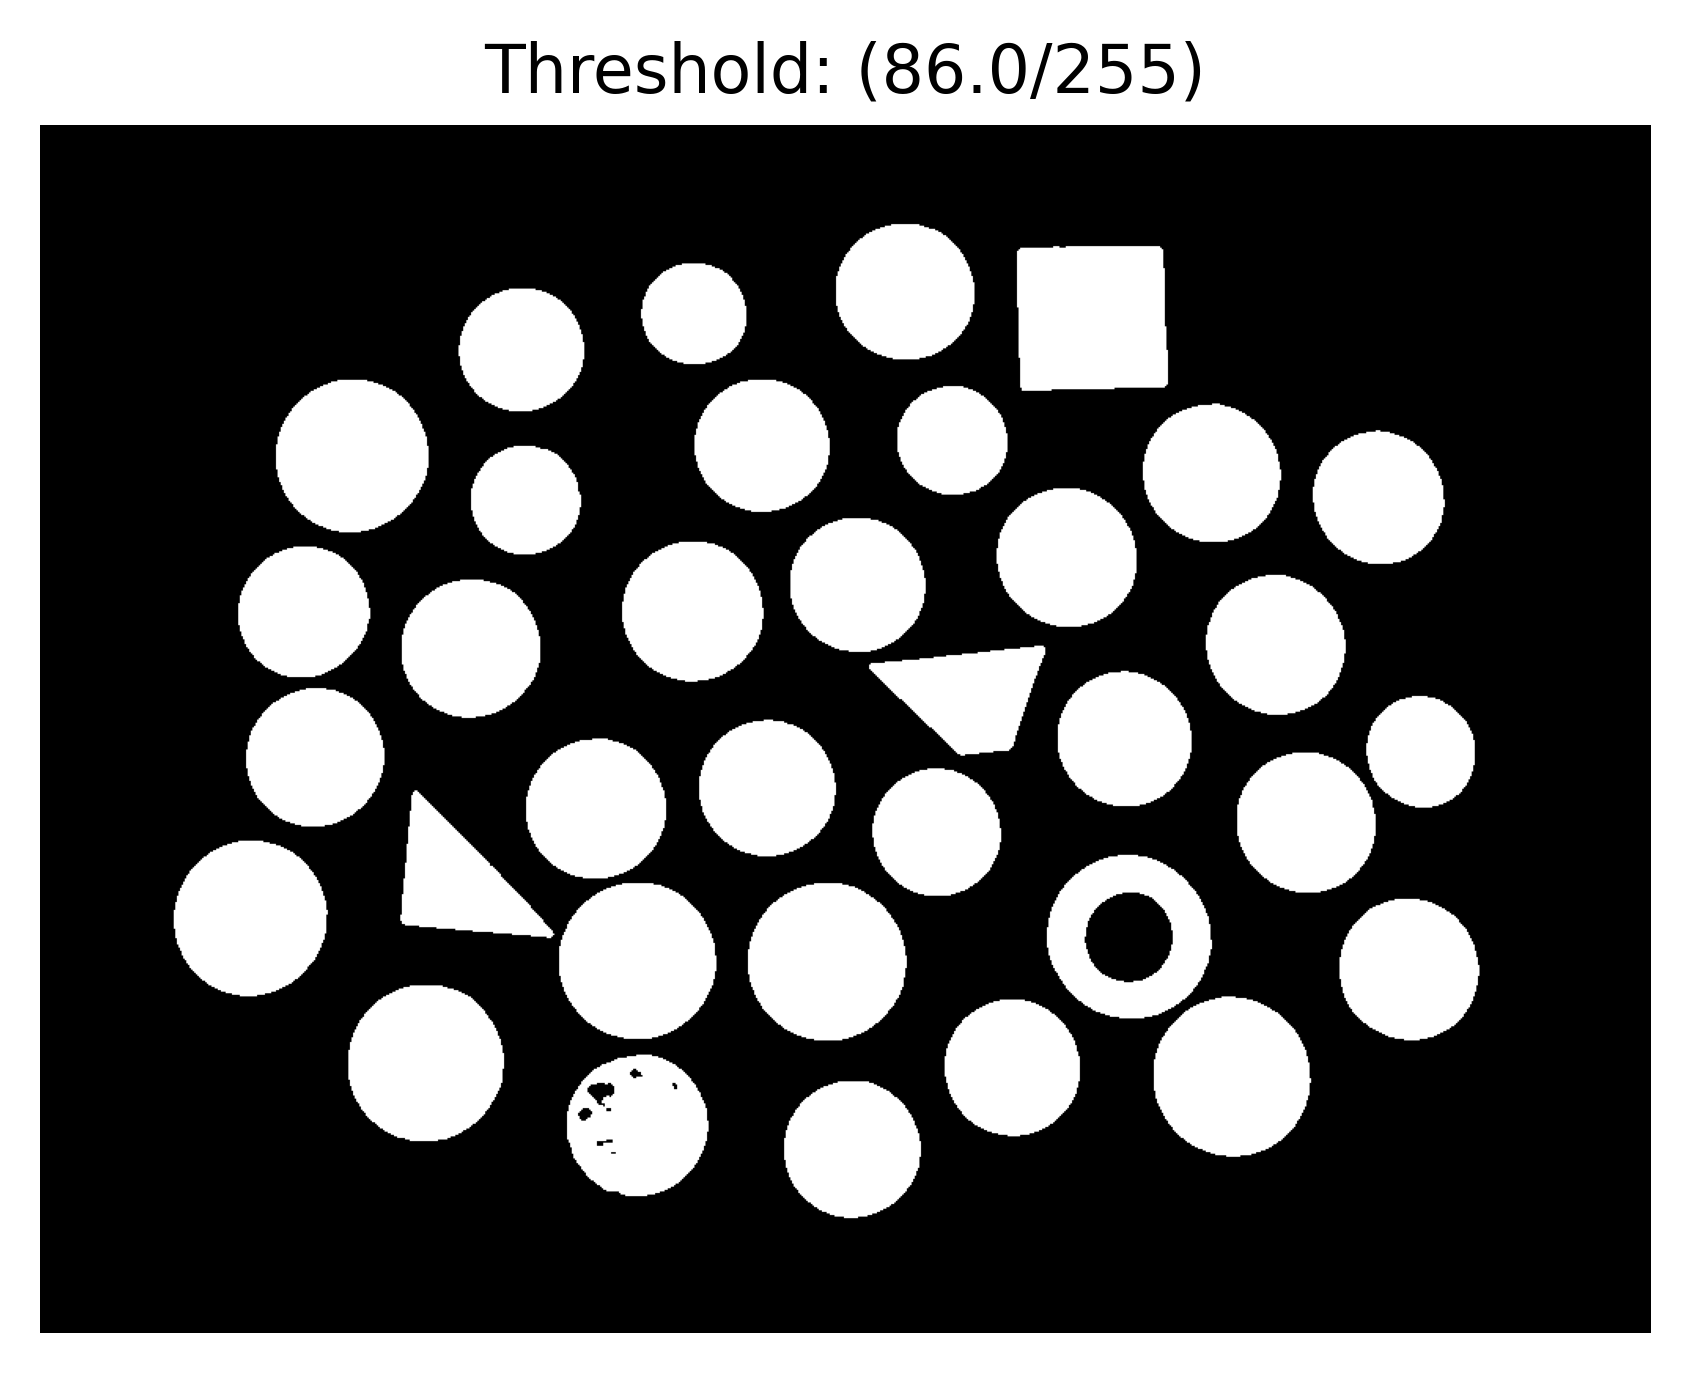

In [21]:
fig = plt.figure()

# fig.add_subplot(2, 2, 1)
# plt.title("Mean")
# plt.imshow(ret0, cmap='gray')

# fig.add_subplot(2, 2, 2)
# plt.title("Gaussian")
# plt.imshow(ret1, cmap='gray')

fig.add_subplot(1, 1, 1)
plt.axis('off')
plt.title("Threshold: ({}/255)".format(ret))
plt.imshow(thresh, cmap='gray')

plt.show()

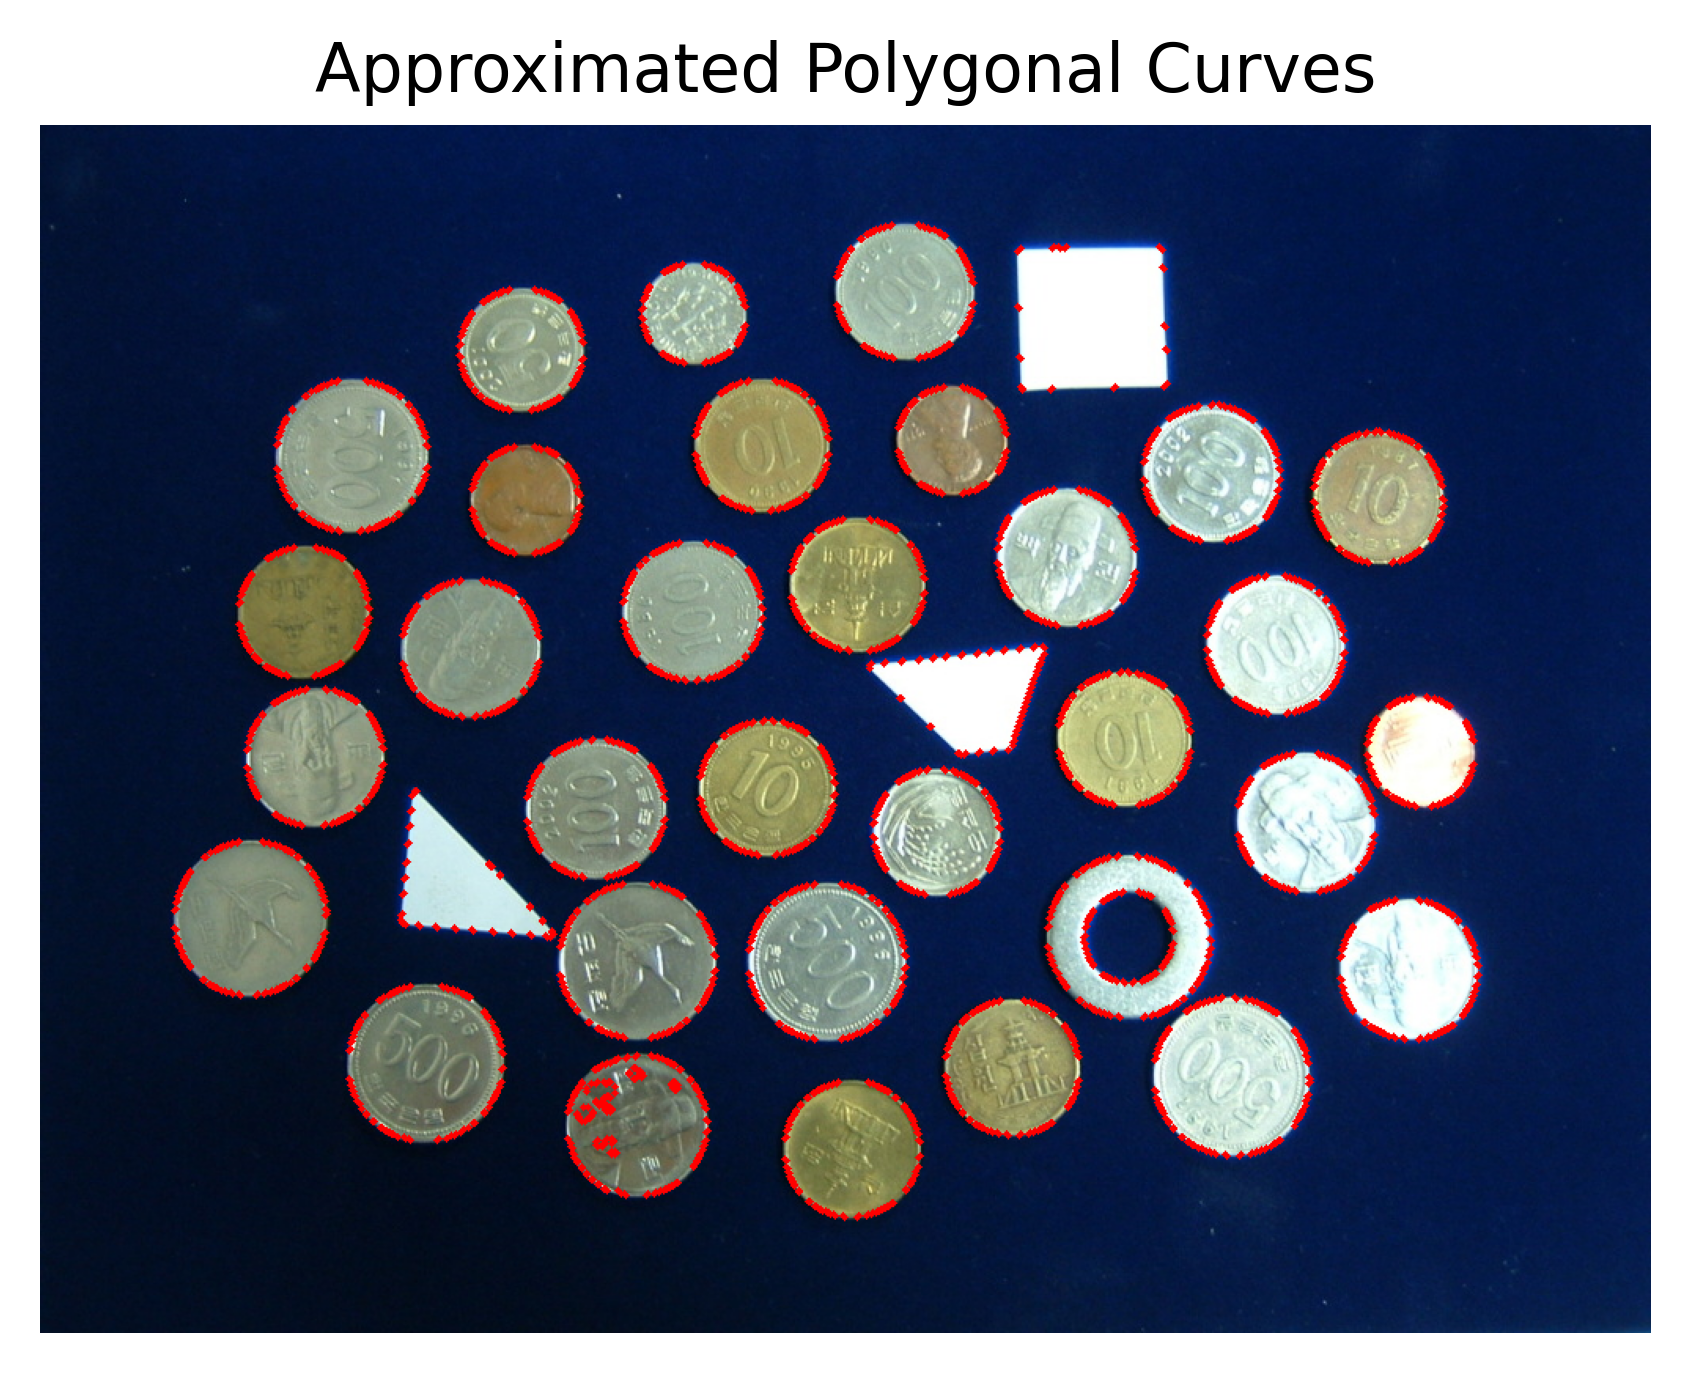

In [22]:
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
sorted_ctrs = sorted(contours, key=lambda ctr: cv.boundingRect(ctr)[0])
approxPolyCurves = original.copy()

for i, ctr in enumerate(sorted_ctrs):
    epsilon = 0.001*cv.arcLength(ctr,True)
    approx = cv.approxPolyDP(ctr,epsilon,True)    
    cv.drawContours(approxPolyCurves, approx, -1, (0, 0, 255), 3)

plt.title("Approximated Polygonal Curves")
plt.axis('off')
plt.imshow(cv.cvtColor(approxPolyCurves, cv.COLOR_BGR2RGB))
plt.show()

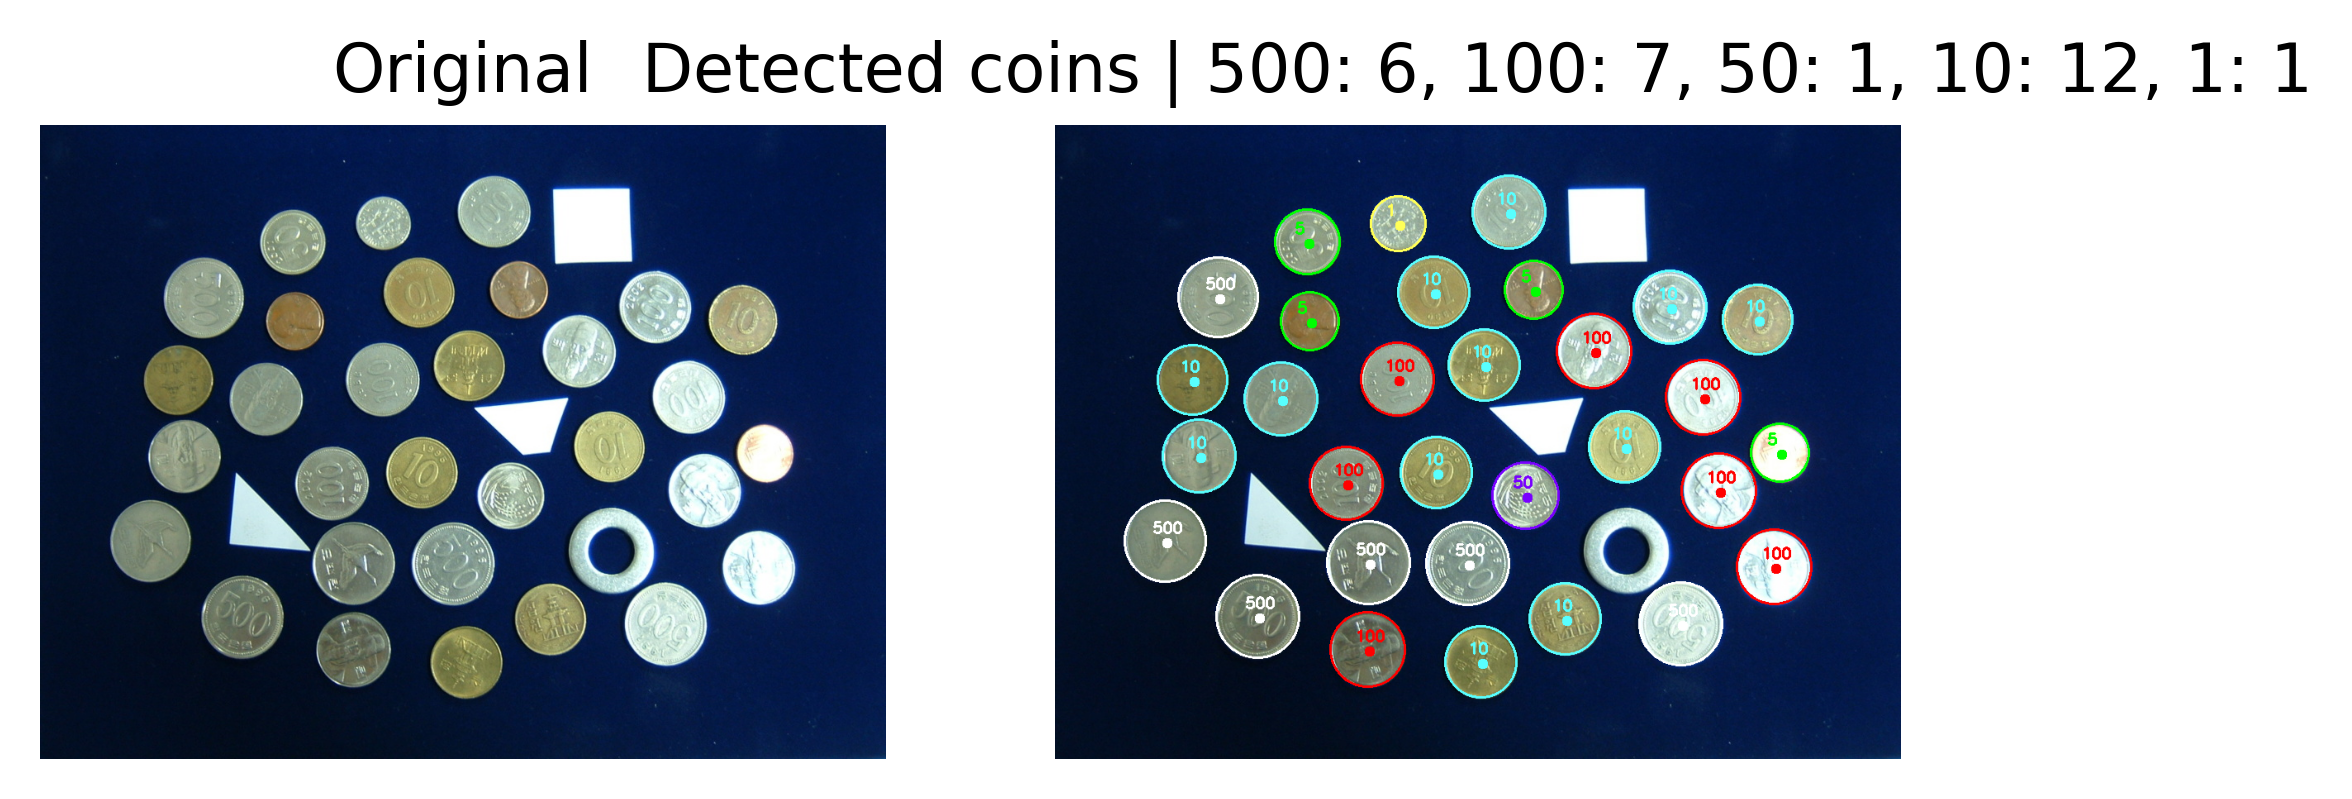

In [23]:
circleAreas = []
circleCenters = []
circles = {}
coins = {"500": 0, "100": 0, "50": 0, "10": 0, "5": 0, "1": 0}

for i, ctr in enumerate(sorted_ctrs):
    epsilon = 0.001*cv.arcLength(ctr,True)
    approx = cv.approxPolyDP(ctr,epsilon,True)
    if (len(approx) > 80):
        (x, y), radius = cv.minEnclosingCircle(ctr)
        if (thresh[int(y)][int(x)] != 0):
            area = int(math.pi * (radius ** 2))
            circles[radius] = (int(x), int(y))
            fontColor = (0,0,0)
            imgcenter = (int(x-15),int(y-10))
            font = cv.FONT_HERSHEY_SIMPLEX

            if (area > 7500):
                coins["500"] += 1
                text = "500"
                fontColor = (255,255,255)
            elif (7500 > area >= 6300):
                coins["100"] += 1
                text = "100"
                fontColor = (0,0,255)
            elif (6300 > area >= 5500):
                coins["10"] += 1
                text = "10"
                fontColor = (255,255,88)
            elif (5500 > area >= 5000):
                coins["50"] += 1
                text = "50"
                fontColor = (255,0,120)
            elif (5000 > area >= 3800):
                coins["5"] += 1
                text = "5"
                fontColor = (0,255,0)
            elif (area < 3800):
                coins["1"] += 1
                text = "1"
                fontColor = (88,255,255)
            cv.putText(detected, str(text), imgcenter, font, 0.6, fontColor, 2)
#                 cv.putText(original, str("{}: {}".format(text, int(radius))), imgcenter, font, 0.6, fontColor, 2)
            cv.circle(detected, (int(x), int(y)), int(radius), fontColor, 2)
            cv.rectangle(detected, (int(x), int(y)), (int(x)+5,int(y)+5), fontColor, 5)
cv.imwrite("images/detected.jpg", detected)

fig = plt.figure()

fig.add_subplot(1, 2, 1)
plt.axis('off')
plt.title("Original")
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))

fig.add_subplot(1, 2, 2)
plt.axis('off')
plt.title("Detected coins | 500: {0}, 100: {1}, 50: {2}, 10: {3}, 1: {4}".format(coins["500"], coins["100"], coins["50"], coins["10"], coins["1"]))
plt.imshow(cv.cvtColor(detected, cv.COLOR_BGR2RGB))

plt.show()